# 3. Supervised Machine Learning: Classification

In this task we want to try and use DecisionTreeClassifier to predict the attrition of an employee. We'll use the cleaned dataset, perform label encoding so we can create a correlation matrix and remove columns that have too small of a correlation with Attrition to matter.

We then use one hot encoding to convert categorical values to numbers while avoiding arbitrary ranking. This data is then split into a training set and a test set.

In [1364]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas as pd
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for numeric calculations
import numpy as np

# from utilities import visualize_classifier
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

## Reading the Data
We begin by reading the cleaned dataset and getting some basic information like it's shape and the likes.

In [1365]:
# Read the data
df = pd.read_csv("Cleaned-HR-Employee-Attrition.csv")

In [1366]:
# Check the shape of the data
df.shape

(1074, 32)

In [1367]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6


In [1368]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,...,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,34.714153,802.863128,9.198324,2.841713,1033.861266,2.718808,66.357542,2.725326,1.658287,2.734637,...,3.159218,2.709497,0.790503,8.327747,2.810056,2.760708,5.133147,3.389199,0.967412,3.318436
std,8.305852,402.222049,8.021683,1.033047,612.289787,1.093521,20.197919,0.717230,0.686436,1.104668,...,0.366050,1.079921,0.868772,4.802593,1.313508,0.713014,3.723926,3.041698,1.278491,3.061515
min,18.000000,103.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,465.500000,2.000000,2.000000,484.250000,2.000000,49.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000
50%,34.000000,805.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,8.000000,3.000000,3.000000,5.000000,2.000000,1.000000,2.000000
75%,39.750000,1162.000000,14.000000,4.000000,1585.750000,4.000000,84.000000,3.000000,2.000000,4.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,5.000000,1.000000,5.000000
max,60.000000,1498.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,3.000000,4.000000,...,4.000000,4.000000,3.000000,23.000000,6.000000,4.000000,18.000000,16.000000,5.000000,17.000000


In [1369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1074 non-null   int64 
 1   Attrition                 1074 non-null   object
 2   BusinessTravel            1074 non-null   object
 3   DailyRate                 1074 non-null   int64 
 4   Department                1074 non-null   object
 5   DistanceFromHome          1074 non-null   int64 
 6   Education                 1074 non-null   int64 
 7   EducationField            1074 non-null   object
 8   EmployeeNumber            1074 non-null   int64 
 9   EnvironmentSatisfaction   1074 non-null   int64 
 10  Gender                    1074 non-null   object
 11  HourlyRate                1074 non-null   int64 
 12  JobInvolvement            1074 non-null   int64 
 13  JobLevel                  1074 non-null   int64 
 14  JobRole                 

The Yes and No values of the attriton column are converted to numeric values. This is done manually as opposed to using Label Encoding to ensure they get converted to these specific values.

In [1370]:
# Re-encode so Yes = 1, No = 0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [1371]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6


## Label Encoding

We want to convert categorical data in the dataframe into numeric data. This is to create a correlation matrix so we can remove non-correlated columns. To perform the encoding we use the Label Encoder from sklern.

We begin by first extracting all the non-numeric columns.

In [1372]:
# Select all the columns that are not numeric
data_column_category = df.select_dtypes(exclude=[np.number]).columns

In [1373]:
# View column categories
data_column_category

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [1374]:
# Print the first five rows of the new dataframe
df[data_column_category].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No


In [1375]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [1376]:
label_encoder = LabelEncoder()

After we've extracted the non-numeric columns we'll then create a copy of the dataframe and perform the encoding.

In [1377]:
# Make a copy of your DataFrame
df_label_encoded = df.copy()

In [1378]:
# Performing label encoding
for i in data_column_category:
    df_label_encoded[i] = label_encoder.fit_transform(df_label_encoded[i])

In [1379]:
# View the label encoded data
print("Label Encoded Data: ")
df_label_encoded.head()

Label Encoded Data: 


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,32,0,1,1005,1,2,2,1,8,4,...,3,3,0,8,2,2,7,7,3,6


In [1380]:
df_label_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,32,0,1,1005,1,2,2,1,8,4,...,3,3,0,8,2,2,7,7,3,6


## Correlation Matrix

Now that we have a label encoded dataframe we can use it to create a correlation for the Attrition column to see what columns have an effect on employee Attrition.

In [1381]:
# Create a correlation matrix relative to the Attrition column
corr_matrix = df_label_encoded.corr()['Attrition']
print(corr_matrix)

Age                        -0.180324
Attrition                   1.000000
BusinessTravel             -0.000380
DailyRate                  -0.044980
Department                  0.048934
DistanceFromHome            0.100353
Education                  -0.032757
EducationField              0.032088
EmployeeNumber             -0.019059
EnvironmentSatisfaction    -0.115010
Gender                      0.018393
HourlyRate                 -0.001972
JobInvolvement             -0.145100
JobLevel                   -0.168133
JobRole                     0.032166
JobSatisfaction            -0.140488
MaritalStatus               0.163030
MonthlyIncome              -0.163596
MonthlyRate                 0.032200
NumCompaniesWorked          0.040166
OverTime                    0.240490
PercentSalaryHike          -0.012910
PerformanceRating           0.023889
RelationshipSatisfaction   -0.069119
StockOptionLevel           -0.159709
TotalWorkingYears          -0.209392
TrainingTimesLastYear      -0.046692
W

In [1382]:
corr_matrix.shape

(32,)

We identify which columns contribute the least to Attrition and proceed to drop them from the data frame.

In [1383]:
# Identify columns to remove
cols_to_remove = corr_matrix[corr_matrix.abs() < 0.1].index.tolist()

print(f"Columns to be removed ({len(cols_to_remove)}): {cols_to_remove}")

Columns to be removed (17): ['BusinessTravel', 'DailyRate', 'Department', 'Education', 'EducationField', 'EmployeeNumber', 'Gender', 'HourlyRate', 'JobRole', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion']


In [1384]:
df = df.drop(columns=cols_to_remove)

In [1385]:
df.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,1,2,3,2,4,Single,5993,Yes,0,8,6,4,5
1,49,0,8,3,2,2,2,Married,5130,No,1,10,10,7,7
2,37,1,2,4,2,1,3,Single,2090,Yes,0,7,0,0,0
3,33,0,3,4,3,1,3,Married,2909,Yes,0,8,8,7,0
4,32,0,2,4,3,1,4,Single,3068,No,0,8,7,7,6


## One-Hot Encoding

Now that we've further cleaned the data and removed unnecessary columns we can then proceed to perform One-Hot encoding to convert the categorical data to numeric data. This is different from before where we used Label Encoding.

Before we used Label Encoding simply so we could create a correlation matrix to drop low contrubiting columns. But now we want to encode the data so it can be used to train our DecisionTreeClassifier.

We use One-Hot Encoding because it avoids an abitrary ranking that can occure when categorical data are given simple numeric values such as 1, 2, 3, 4. This way we'll ensure that no label is treated as "better" than another.

In [1386]:
# Select all the columns that are not numeric
data_column_category = df.select_dtypes(exclude=[np.number]).columns

In [1387]:
data_column_category

Index(['MaritalStatus', 'OverTime'], dtype='object')

In [1388]:
# Print the first five rows of the new dataframe
df[data_column_category].head()

,MaritalStatus,OverTime
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,Yes
4,Single,No


In [1389]:
df_onehot_getdummies = pd.get_dummies(df[data_column_category], prefix=data_column_category, dtype=int)

In [1390]:
data_column_number = df.select_dtypes(include=[np.number]).columns

In [1391]:
data_column_number

Index(['Age', 'Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [1392]:
# Print the first five rows of the new dataframe
df[data_column_number].head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,1,2,3,2,4,5993,0,8,6,4,5
1,49,0,8,3,2,2,2,5130,1,10,10,7,7
2,37,1,2,4,2,1,3,2090,0,7,0,0,0
3,33,0,3,4,3,1,3,2909,0,8,8,7,0
4,32,0,2,4,3,1,4,3068,0,8,7,7,6


In [1393]:
df_onehot_encoded = pd.concat([df_onehot_getdummies,df[data_column_number]],axis = 1)

In [1394]:
df_onehot_encoded.columns

Index(['MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes', 'Age',
       'Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [1395]:
df_onehot_encoded

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,0,1,0,1,41,1,1,2,3,2,4,5993,0,8,6,4,5
1,0,1,0,1,0,49,0,8,3,2,2,2,5130,1,10,10,7,7
2,0,0,1,0,1,37,1,2,4,2,1,3,2090,0,7,0,0,0
3,0,1,0,0,1,33,0,3,4,3,1,3,2909,0,8,8,7,0
4,0,0,1,1,0,32,0,2,4,3,1,4,3068,0,8,7,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,0,1,0,1,0,36,0,23,3,4,2,4,2571,1,17,5,2,3
1070,0,1,0,1,0,39,0,6,4,2,3,1,9991,1,9,7,7,7
1071,0,1,0,0,1,27,0,4,2,4,2,2,6142,1,6,6,2,3
1072,0,1,0,1,0,49,0,2,4,2,2,2,5390,0,17,9,6,8


## Prepare The Data For Training

Next we'll prepare the training data. We begin off by moving the Attrition column to the end so it's easier to select the features and labels.

In [1396]:
# Move the Attrition column to the end
cols = [col for col in df_onehot_encoded.columns if col != 'Attrition'] + ['Attrition']
df_onehot_encoded = df_onehot_encoded[cols]

In [1397]:
df_onehot_encoded.head()

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Attrition
0,0,0,1,0,1,41,1,2,3,2,4,5993,0,8,6,4,5,1
1,0,1,0,1,0,49,8,3,2,2,2,5130,1,10,10,7,7,0
2,0,0,1,0,1,37,2,4,2,1,3,2090,0,7,0,0,0,1
3,0,1,0,0,1,33,3,4,3,1,3,2909,0,8,8,7,0,0
4,0,0,1,1,0,32,2,4,3,1,4,3068,0,8,7,7,6,0


In [1398]:
# Convert the dataset into array
array = df_onehot_encoded.values

In [1399]:
# Create two (sub) arrays from it
# X - features, all rows, all columns but the last one
# y - labels, all rows, the last column
X, y = array[:, :-1], array[:, -1]

In [1400]:
print(X.shape)
print(y.shape)

(1074, 17)
(1074,)


In [1401]:
# Separate input data into classes based on labels of 'Attrition'
# The data is separated based on the two values Attrition can have. 0 or 1 (No or Yes)
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])

## Step 4: Training

Now that we have the training data we're ready to train our DecisionTreeClassifier.

1. We begin with splittingi the dataset into two: __training set__ and __test set__
2. Next we build the classifier by implementing __Decision Tree__ algorithm over the training set
3. We then test the classifier over the test set
3. Finally we estimate how accurate it is

In [1402]:
# Split the dataset into into training and testing sets in proportion 8:2 
#   80% of it as training data
#   20% as a validation dataset
set_prop = 0.2

In [1403]:
#  Initialize seed parameter for the random number generator used for the split
seed = 7

In [1404]:
# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [1405]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(859, 17)
(859,)
(215, 17)
(215,)


In [1406]:
# Build Decision Trees Classifier 
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)
 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [1407]:
# draw tree from the trained data by graphviz package
import graphviz

num_feature_names = X.shape[1]

dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=df_onehot_encoded.columns[:num_feature_names], class_names = True,        
                         filled=True, rounded=True, proportion = False,
                         special_characters=True)

In [1408]:
# result DT saved in file heart.pdf
graph = graphviz.Source(dot_data)
graph.render("company2") 

'company2.pdf'

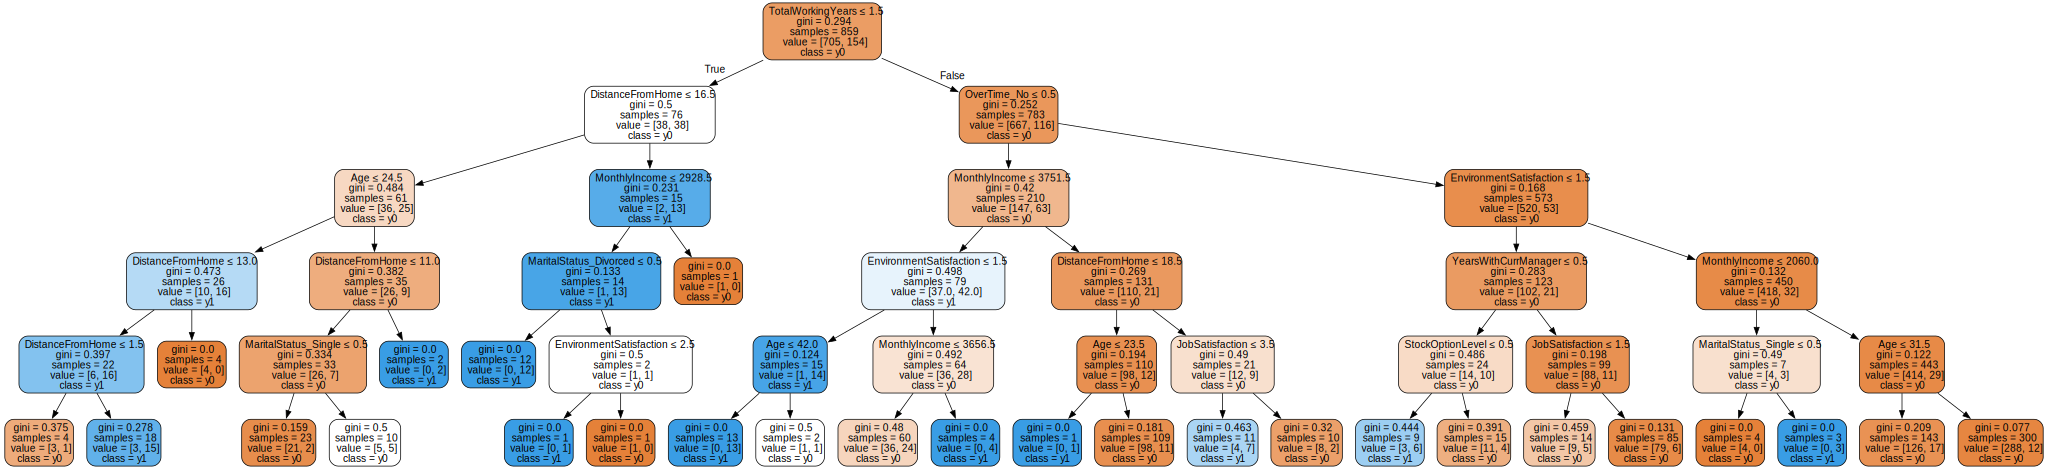

In [1409]:
# show it here
graph

## Step 5. Model Validation

Now that we've trained our model proceed to validation. We do this by creating a confusion matrix where we look for correct predictions and give a general idea of the errors made in predictions.

We'll also take a look at the models performance on the training set and the test set.

In [1410]:
# Set the metrics
scoring = 'accuracy'

Now we can try to implement the model on our test set.

In [1411]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [1412]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.8465116279069768


In [1413]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[174,  10],
       [ 23,   8]], dtype=int64)

In [1414]:
confusion = pd.crosstab(y_test,y_testp)
confusion

col_0,0,1
row_0,,
0,174,10
1,23,8


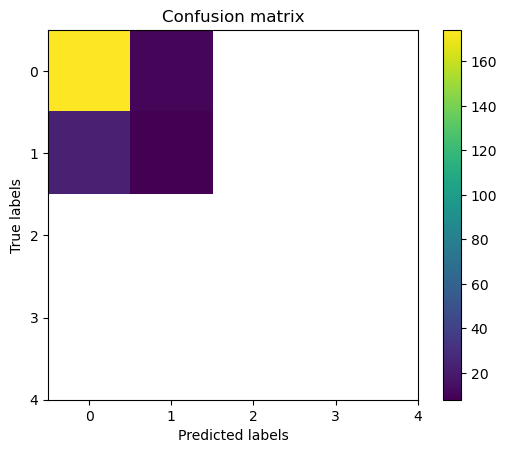

In [1415]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

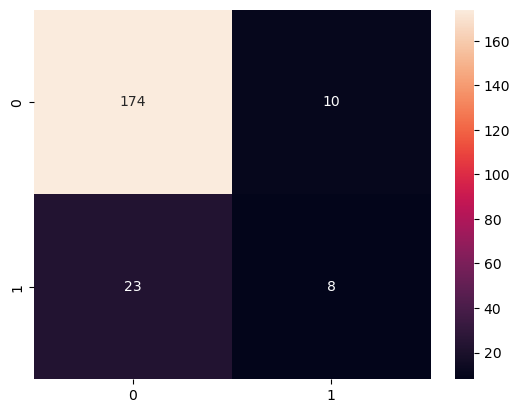

In [1420]:
import seaborn as sns
sns.heatmap(confusion_mat, annot=True, fmt="d")

### Confusion Matrix Summary:

Out of the employees who actually stayed (class 0):
- 174 were correctly predicted to stay (true negatives)
- 10 were incorrectly predicted to leave (false positives)

Out of the employees who actually left (class 1):
- 8 were correctly predicted to leave (true positives)
- 23 were missed and predicted to stay (false negatives)

This means the model is good at identifying employees who will stay but struggles to detect those who will leave.

In [1417]:
class_names = ['No Attrition', 'Attrition']
# Classifier performance on training dataset
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

No Attrition       0.89      0.99      0.93       705
   Attrition       0.86      0.42      0.56       154

    accuracy                           0.88       859
   macro avg       0.88      0.70      0.75       859
weighted avg       0.88      0.88      0.87       859



In [ ]:
# Classifier performance on test dataset
print(classification_report(y_test, classifier.predict(X_test), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

No Attrition       0.88      0.95      0.91       184
   Attrition       0.44      0.26      0.33        31

    accuracy                           0.85       215
   macro avg       0.66      0.60      0.62       215
weighted avg       0.82      0.85      0.83       215



## Conclusion
Based on the evaluation metrics, the classifier performs well at identifying employees who will stay with the company, achieving high precision and recall for the "No Attrition" class on both training and test data. However, the model struggles to correctly identify employees who will leave ("Attrition"), with much lower recall and f1-score for this class-especially on the test set, where recall drops to 0.26. This suggests the model misses many actual attrition cases.

Overall, while the model is accurate for predicting retention, it is less effective at detecting attrition. Improving the model’s ability to identify employees at risk of leaving-perhaps by addressing class imbalance or tuning model parameters-could make it more useful for attrition prediction tasks.